In [1]:
from sympy import *
from sympy.solvers import solve
from sympy.plotting import plot_implicit

In [2]:

pot = x*x/2 + (1-y)/(x+y)-y/(x-1+y)
expr = diff(pot,x)
expr

x + y/(x + y - 1)**2 - (1 - y)/(x + y)**2

In [29]:

nu = Symbol('nu')
#gamma = Symbol('gamma')
#mu = Symbol('mu')
x = Function('x')(nu)

imp = x*(x+nu**3)**2*(x+nu**3-1)**2 -(1-nu**3)*(x+nu**3-1)**2+nu**3*(x+nu**3)**2
#imp = gamma**2*(1-gamma)**2*(1-mu-gamma) - (1-mu)*gamma**2 + (1-gamma)**2*mu
#plot_implicit(x*(x+nu**3)**2*(x+nu**3-1)**2 -(1-nu**3)*(x+nu**3-1)**2+nu**3*(x+nu**3)**2, (x,1-.1,1+.1), (nu, -.1,.1))

In [30]:
solve(imp.subs(nu,0),x.subs(nu,0))

[1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]

In [31]:
imp1 = diff(imp,nu)
simplify(solve(imp1,diff(x,nu))[0])
#imp1.subs([(mu,0),(gamma.subs(mu,0),0)])

nu**2*(-12*nu**9*x(nu) - 36*nu**6*x(nu)**2 + 18*nu**6*x(nu) - 18*nu**6 - 36*nu**3*x(nu)**3 + 36*nu**3*x(nu)**2 - 30*nu**3*x(nu) + 18*nu**3 - 12*x(nu)**4 + 18*x(nu)**3 - 12*x(nu)**2 + 12*x(nu) - 9)/(nu**12 + 8*nu**9*x(nu) - 2*nu**9 + 18*nu**6*x(nu)**2 - 12*nu**6*x(nu) + 5*nu**6 + 16*nu**3*x(nu)**3 - 18*nu**3*x(nu)**2 + 8*nu**3*x(nu) - 4*nu**3 + 5*x(nu)**4 - 8*x(nu)**3 + 3*x(nu)**2 - 2*x(nu) + 2)

In [37]:
imp2 = diff(imp1,nu)
imp2.subs([(nu,0),(x.subs(nu,0),1)])

0

In [21]:
imp3 = diff(imp2,gamma)
imp3.subs([(gamma,0),(mu.subs(gamma,0),0)])

6*Subs(Derivative(mu(gamma), gamma), gamma, 0) - 6*Subs(Derivative(mu(gamma), (gamma, 2)), gamma, 0) + Subs(Derivative(mu(gamma), (gamma, 3)), gamma, 0) - 18

1.6422315548646298
1.0047496895387038 -1.5001004654773493
[-2.49692023059352, 2.49692023059352, -2.06467615310203*I, 2.06467615310203*I]
[0.551654745309908, 2.65380280650782, -4.11071185478145, 7.99726982315446]
-0.8111349321345599


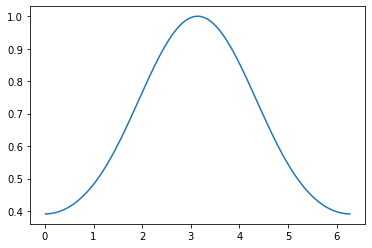

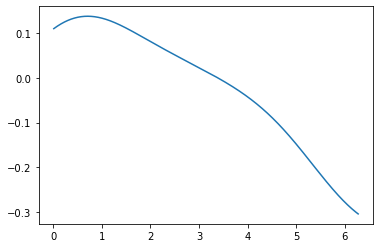

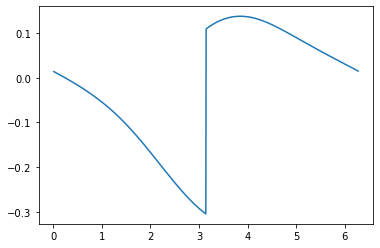

0.014473155748012237

In [1]:
import sympy as sp
import numpy as np
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

factor = 7.7857/2.2792
a = 3**(-2/3)*factor
print(a)
a_min = (3**(-2/3)-.149)*factor
a_max = (3**(-2/3)+.149)*factor

e, p, q = sp.symbols('e phi psi')
x = (a*(1-e**2))/(1+e*sp.cos(p-q))*sp.cos(p)
y = (a*(1-e**2))/(1+e*sp.cos(p-q))*sp.sin(p)
xd = y - (sp.sin(p)+e*sp.sin(q))/sp.sqrt(a*(1-e**2))
yd = -x + (sp.cos(p)+e*sp.cos(q))/(sp.sqrt(a*(1-e**2)))



mu = 6.4/(6.4+2*10**7)
xe, ye = sp.symbols('x y')
U = xe**2/2 + (1-mu)/sp.sqrt((xe+mu)**2) + mu/sp.sqrt((xe+mu-1)**2)
Ud = sp.diff(U,xe)

def UU(x,y):
    return -.5*(x**2+y**2) - (1-mu)/((x+mu)**2+y**2)**.5 - mu/((x-1+mu)**2+y**2)**.5

Um = sp.lambdify(xe,Ud,"scipy")
XE = fsolve(Um,1.01, xtol=.0000000000001)[0]
print(XE, UU(XE,0))
mub = mu*np.abs(XE-1+mu)**(-3) + (1-mu)*np.abs(XE+mu)**(-3)
A, B = 2*mub+1, mub-1

eigen = sp.solve(xe**4+(2-mub)*xe**2+(1+mub-2*mub**2),xe)
print(eigen)
ei_lam, ei_nu = eigen[1], eigen[3]/sp.I

sigma = 2*ei_lam/(ei_lam**2+B)
tau = -(ei_nu**2+A)/(2*ei_nu)

alpha = ((x-XE)*(ei_lam*ei_nu*tau**2)+y*(ei_lam*ei_nu*sigma+ei_nu**2*tau)+xd*(ei_lam*sigma*tau+ei_nu*tau**2)+yd*(-ei_lam*tau+ei_nu*sigma))/(2*ei_lam**2*sigma*tau-2*ei_lam*ei_nu*sigma**2+2*ei_lam*ei_nu*tau**2-2*ei_nu**2*sigma*tau)
div = 2*ei_lam**2*sigma*tau-2*ei_lam*ei_nu*sigma**2+2*ei_lam*ei_nu*tau**2-2*ei_nu**2*sigma*tau
print([ei_lam*ei_nu*tau**2/div,ei_lam*ei_nu*sigma+ei_nu**2*tau/div,ei_lam*sigma*tau+ei_nu*tau**2/div,-ei_lam*tau+ei_nu*sigma/div])

uuu = sp.solve(a*(1-e**2)/(1+e*sp.cos(q))-1,e)

alpha2 = alpha.subs(p,0)
fun = [alpha2.subs(e,uuu[0]), alpha2.subs(e,uuu[1])]

f = sp.lambdify(q, fun[0], "numpy")
g = sp.lambdify(q,fun[1], "numpy")

ee1 = sp.lambdify(q, uuu[0], "numpy")
ee2 = sp.lambdify(q, uuu[1], "numpy")



X = np.linspace(.01,2*np.pi-.01,1000)
Y = ee2(X)
print(ee1(1))
plt.plot(X,Y)
plt.show()

Y = f(X)
plt.plot(X,Y)
plt.show()

Y = g(X)
plt.plot(X,Y)
plt.show()

g(0)

In [131]:
t, r = sp.symbols('t r')
theta = sp.Function('theta')(t)
yyd = sp.diff(r*(1-e**2)*sp.cos(theta)/(1+e*sp.cos(theta+t-q)),t).subs(sp.diff(theta,t),(1+e*sp.cos(theta+t-q))**2*sp.sqrt(r*(1-e**2))/(r*(1-e**2))**2-1)
yyd#(1+e*sp.cos(theta+t-q))**2*sp.sqrt(r**2*(1-e**2))/(r*(1-e**2))**2-1

e*sqrt(r*(1 - e**2))*sin(-psi + t + theta(t))*cos(theta(t))/(r*(1 - e**2)) - r*(-1 + sqrt(r*(1 - e**2))*(e*cos(-psi + t + theta(t)) + 1)**2/(r**2*(1 - e**2)**2))*(1 - e**2)*sin(theta(t))/(e*cos(-psi + t + theta(t)) + 1)